# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

In [41]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

<IPython.core.display.Javascript object>


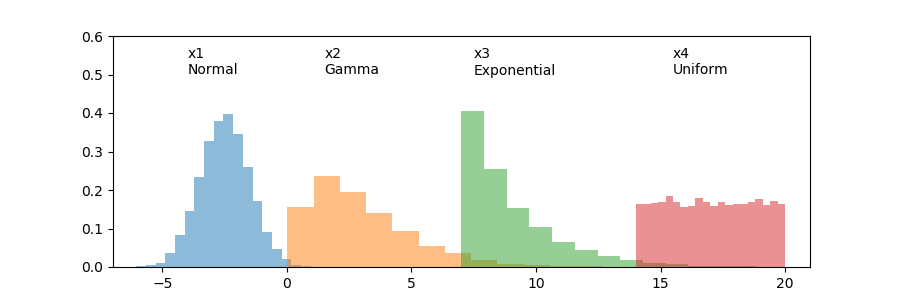

Text(15.500267781553045, 0.5, 'x4\nUniform')

In [42]:
# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

# Static subplots

Just to see how the subplots work

<IPython.core.display.Javascript object>


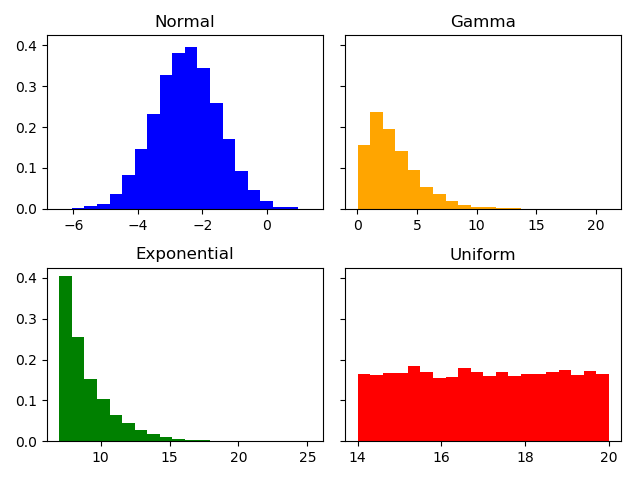

In [43]:
fig, ax = plt.subplots(2,2, sharey=True)
ax[0][0].hist(x1, normed=True, bins=20, color='blue')
ax[0][1].hist(x2, normed=True, bins=20, color='orange')
ax[1][0].hist(x3, normed=True, bins=20, color='green')
ax[1][1].hist(x4, normed=True, bins=20, color='red')
ax[0][0].set_title('Normal')
ax[0][1].set_title('Gamma')
ax[1][0].set_title('Exponential')
ax[1][1].set_title('Uniform')
fig.tight_layout()

# Animated subplots

<IPython.core.display.Javascript object>


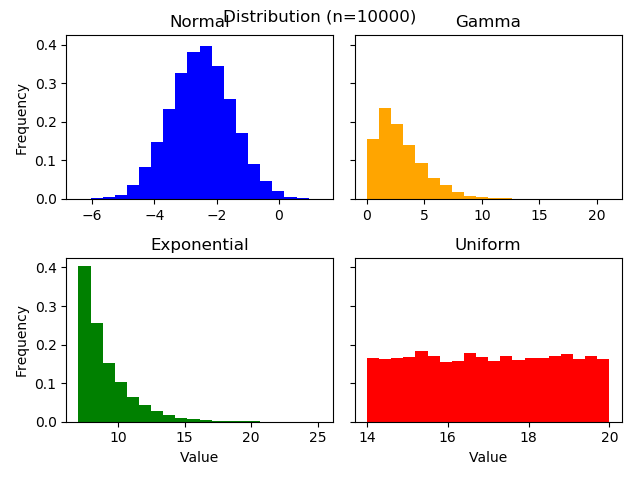

In [44]:
import matplotlib.animation as animation

# Number of iterations.
n = 20
# Total duration (seconds)
total_duration = 20
# Time between iterations (total duration = 20s).
interval = total_duration/n * 1000

# Using geomspace (to better see the changes).
slices = np.geomspace(1,10000,n, dtype=int)

# Function that will do the plotting.
def update(curr):
    # Stop animation 'a' if it is at the last frame.
    if curr == n: 
        a.event_source.stop()

    until = slices[curr]
    ax = fig.get_axes()
    fig.suptitle(f'Distribution (n={until})')
    ax[0].cla()
    ax[1].cla()
    ax[2].cla()
    ax[3].cla()

    ax[0].set_title('Normal')
    ax[1].set_title('Gamma')
    ax[2].set_title('Exponential')
    ax[3].set_title('Uniform')
    
    ax[0].set_ylabel('Frequency')
    ax[2].set_ylabel('Frequency')
    ax[2].set_xlabel('Value')
    ax[3].set_xlabel('Value')
    
    ax[0].hist(x1[:until], normed=True, bins=20, color='blue')
    ax[1].hist(x2[:until], normed=True, bins=20, color='orange')
    ax[2].hist(x3[:until], normed=True, bins=20, color='green')
    ax[3].hist(x4[:until], normed=True, bins=20, color='red')

    fig.tight_layout()
    
fig, ax = plt.subplots(2,2, sharey=True)

a = animation.FuncAnimation(fig, update, interval=interval)

In [40]:
x1 = np.arange(10000)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)

plt.scatter(x1, y1)
plt.title('A tale of 2 subplots')
plt.title('1')
plt.ylabel('Damped oscillation')
plt.xticks(x1, rotation=90, color = 'green')

plt.show()